In [9]:
#导入所需模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#算法
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#训练
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#导入数据
train=pd.read_csv("E:/机器学习/kaggle_learn/House_price/train.csv")
test=pd.read_csv("E:/机器学习/kaggle_learn/House_price/test.csv")

## 数据清洗，缺失值处理

In [11]:
all_data=pd.concat([train,test], ignore_index=True)
all_data.drop(['Id'],axis=1, inplace=True)
all_data.shape

(2919, 80)

In [12]:
aa=all_data.isnull().sum()
aa.shape

(80,)

In [14]:
aa[aa>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [15]:
all_data[all_data.PoolArea != 0][["PoolArea", "PoolQC"]]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd
1974,144,Ex
2420,368,NaN
2503,444,NaN


In [16]:
all_data[(all_data.GarageType.notnull()) & (all_data.GarageYrBlt.isnull())][["Neighborhood", "YearBuilt", "YearRemodAdd", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]


,Neighborhood,YearBuilt,YearRemodAdd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,OldTown,1910,1983,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2576,IDOTRR,1923,1999,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train.loc[[332, 948]][["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,1,0
948,Gd,TA,NaN,Unf,0,Unf,0,936,0,0


In [18]:
test.loc[[27, 580, 725, 757, 758, 888, 1064]][["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"]]



,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,0.0,0.0
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1.0,0.0
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,0.0,1.0
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,0.0,0.0
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,0.0,0.0


In [19]:
y = train["SalePrice"]
y = np.log(y+1)

In [20]:
# PoolQC
test.loc[960, "PoolQC"] = "Fa"
test.loc[1043, "PoolQC"] = "Gd"
test.loc[1139, "PoolQC"] = "Fa"
 
# Garage
test.loc[666, "GarageYrBlt"] = 1979
test.loc[1116, "GarageYrBlt"] = 1979
 
test.loc[666, "GarageFinish"] = "Unf"
test.loc[1116, "GarageFinish"] = "Unf"
 
test.loc[1116, "GarageCars"] = 2
test.loc[1116, "GarageArea"] = 480
 
test.loc[666, "GarageQual"] = "TA"
test.loc[1116, "GarageQual"] = "TA"
 
test.loc[666, "GarageCond"] = "TA"
test.loc[1116, "GarageCond"] = "TA"


In [21]:

# PoolQC
train = train.fillna({"PoolQC": "None"})
test = test.fillna({"PoolQC": "None"})
 
# Alley
train = train.fillna({"Alley": "None"})
test = test.fillna({"Alley": "None"})
 
# FireplaceQu
train = train.fillna({"FireplaceQu": "None"})
test = test.fillna({"FireplaceQu": "None"})
 
# LotFrontage
train = train.fillna({"LotFrontage": 0})
test = test.fillna({"LotFrontage": 0})
 
# Garage
train = train.fillna({"GarageType": "None"})
test = test.fillna({"GarageType": "None"})
train = train.fillna({"GarageYrBlt": 0})
test = test.fillna({"GarageYrBlt": 0})
train = train.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageFinish": "None"})
test = test.fillna({"GarageCars": 0})
test = test.fillna({"GarageArea": 0})
train = train.fillna({"GarageQual": "None"})
test = test.fillna({"GarageQual": "None"})
train = train.fillna({"GarageCond": "None"})
test = test.fillna({"GarageCond": "None"})
 
# Bsmt
train = train.fillna({"BsmtQual": "None"})
test = test.fillna({"BsmtQual": "None"})
train = train.fillna({"BsmtCond": "None"})
test = test.fillna({"BsmtCond": "None"})
train = train.fillna({"BsmtExposure": "None"})
test = test.fillna({"BsmtExposure": "None"})
train = train.fillna({"BsmtFinType1": "None"})
test = test.fillna({"BsmtFinType1": "None"})
train = train.fillna({"BsmtFinSF1": 0})
test = test.fillna({"BsmtFinSF1": 0})
train = train.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinType2": "None"})
test = test.fillna({"BsmtFinSF2": 0})
test = test.fillna({"BsmtUnfSF": 0})
test = test.fillna({"TotalBsmtSF": 0})
test = test.fillna({"BsmtFullBath": 0})
test = test.fillna({"BsmtHalfBath": 0})
 
# MasVnr
train = train.fillna({"MasVnrType": "None"})
test = test.fillna({"MasVnrType": "None"})
train = train.fillna({"MasVnrArea": 0})
test = test.fillna({"MasVnrArea": 0})
 
# MiscFeature,Fence,Utilities
train = train.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
test = test.drop(["Fence", "MiscFeature", "Utilities"], axis=1)
 
# other
test = test.fillna({"MSZoning": "RL"})
test = test.fillna({"Exterior1st": "VinylSd"})
test = test.fillna({"Exterior2nd": "VinylSd"})
train = train.fillna({"Electrical": "SBrkr"})
test = test.fillna({"KitchenQual": "TA"})
test = test.fillna({"Functional": "Typ"})
test = test.fillna({"SaleType": "WD"})


### 探索离群值并删除

In [29]:
train = train.drop([30, 88, 142, 277, 328, 410, 462, 495, 523, 533, 581, 588, 628, 632, 681, 688, 710, 714, 728, 774, 812, 874, 898, 916, 968, 970, 1181, 1182, 1298, 1324, 1383, 1423, 1432, 1453])
y = train["SalePrice"]


KeyError: '[  30   88  142  277  328  410  462  495  523  533  581  588  628  632\n  681  688  710  714  728  774  812  874  898  916  968  970 1181 1182\n 1298 1324 1383 1423 1432 1453] not found in axis'

In [26]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

In [30]:
y=np.log(y+1)
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=150)
gbr.fit(train_dummies, y)
np.sqrt(-cross_val_score(gbr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.10086705365993506

In [31]:
xgbr = XGBRegressor(max_depth=5, n_estimators=400)
xgbr.fit(train_dummies, y)
np.sqrt(-cross_val_score(xgbr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.10051704266055339

In [32]:
lsr = Lasso(alpha=0.00047)
lsr.fit(train_dummies, y)
np.sqrt(-cross_val_score(lsr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.09072389427316206

In [33]:
rr = Ridge(alpha=13)
rr.fit(train_dummies, y)
np.sqrt(-cross_val_score(rr, train_dummies, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.09161386485828482

In [34]:
# 组合模型
train_predict = 0.1 * gbr.predict(train_dummies) + 0.3 * xgbr.predict(train_dummies) + 0.3 * lsr.predict(train_dummies) + 0.3 * rr.predict(train_dummies)

In [38]:
train_predict.shape


(1426,)

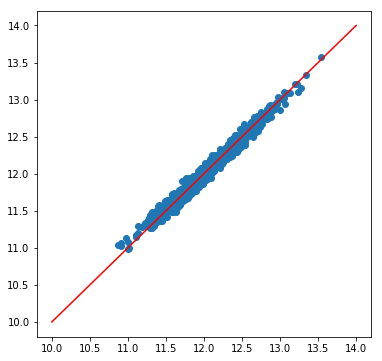

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

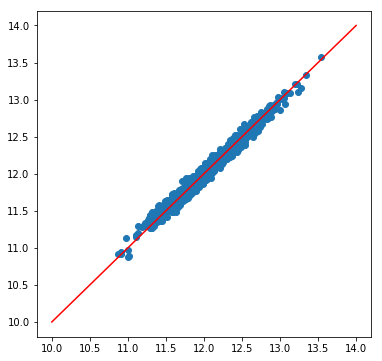

In [40]:
q1 = pd.DataFrame(train_predict).quantile(0.0042)
pre_df = pd.DataFrame(train_predict)
pre_df["SalePrice"] = train_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
train_predict = np.array(pre_df.SalePrice)
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

In [46]:
test_predict = 0.1 * gbr.predict(test_dummies) + 0.3 * xgbr.predict(test_dummies) + 0.3 * lsr.predict(test_dummies) + 0.3 * rr.predict(test_dummies)
q1 = pd.DataFrame(test_predict).quantile(0.0042)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.96
test_predict = np.array(pre_df.SalePrice)
prediction=pd.DataFrame(test_predict,columns=['SalePrice'])
prediction=np.exp(prediction)-1
result=pd.concat([test['Id'],prediction],axis=1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [44]:
result.shape

(1459, 2)

In [47]:
result.to_csv("Predictions2.csv",index=False)